# Result for Quantization case

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from dataset import *
import math
import eval
import greycode_quantization as quan
from matplotlib.backends.backend_pdf import PdfPages

## Loss

### Training Loss

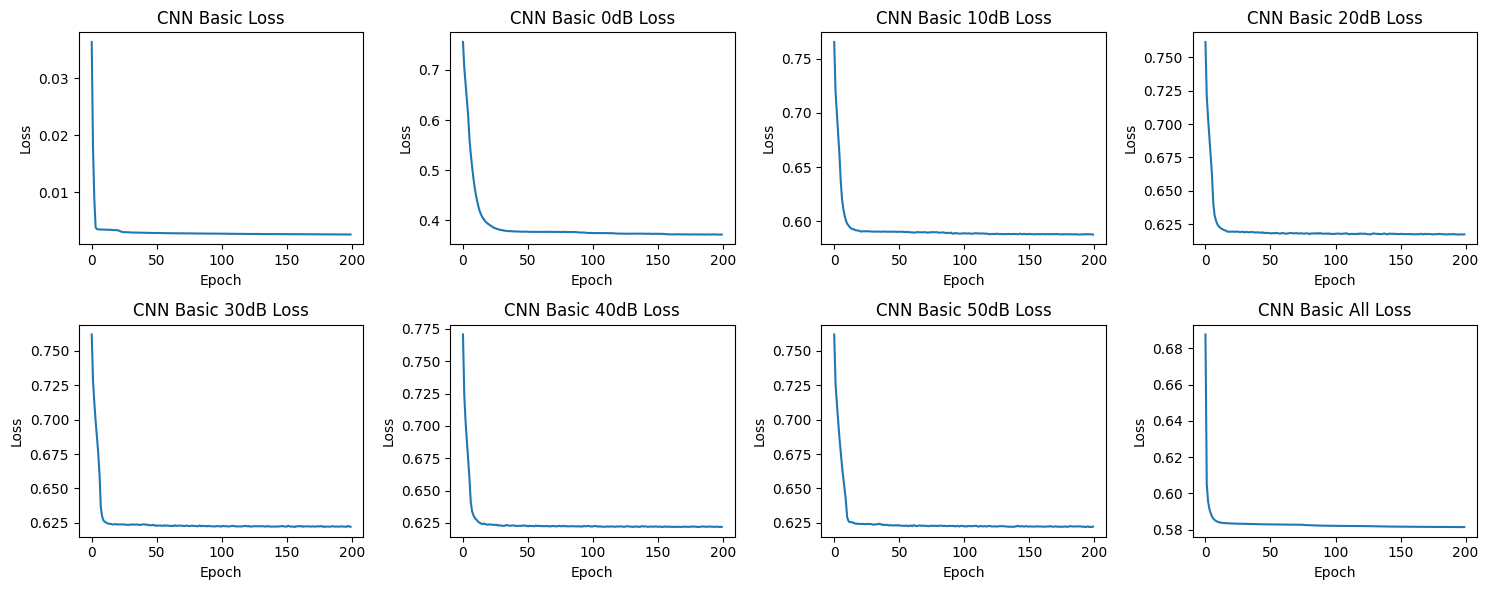

In [129]:
plt.figure(figsize=(15, 6))

plt.subplot(2, 4, 1)
losses = np.load('cnn_basic/losses.npy')
plt.plot(losses[0], losses[1])
plt.title('CNN Basic Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 4, 2)
losses = np.load('cnn_basic_0db/losses.npy')
plt.plot(losses[0], losses[1])
plt.title('CNN Basic 0dB Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 4, 3)
losses = np.load('cnn_basic_10db/losses.npy')
plt.plot(losses[0], losses[1])
plt.title('CNN Basic 10dB Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 4, 4)
losses = np.load('cnn_basic_20db/losses.npy')
plt.plot(losses[0], losses[1])
plt.title('CNN Basic 20dB Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 4, 5)
losses = np.load('cnn_basic_30db/losses.npy')
plt.plot(losses[0], losses[1])
plt.title('CNN Basic 30dB Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 4, 6)
losses = np.load('cnn_basic_40db/losses.npy')
plt.plot(losses[0], losses[1])
plt.title('CNN Basic 40dB Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 4, 7)
losses = np.load('cnn_basic_50db/losses.npy')
plt.plot(losses[0], losses[1])
plt.title('CNN Basic 50dB Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 4, 8)
losses = np.load('cnn_basic_all/losses.npy')
plt.plot(losses[0], losses[1])
plt.title('CNN Basic All Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()

#### ENCODER/FNN/CNN/CNN SPEED

min loss: 0.003524914801080896
min loss: 0.0031448002503315126
min loss: 0.0026083044043709504
min loss: 0.0026032555375451127


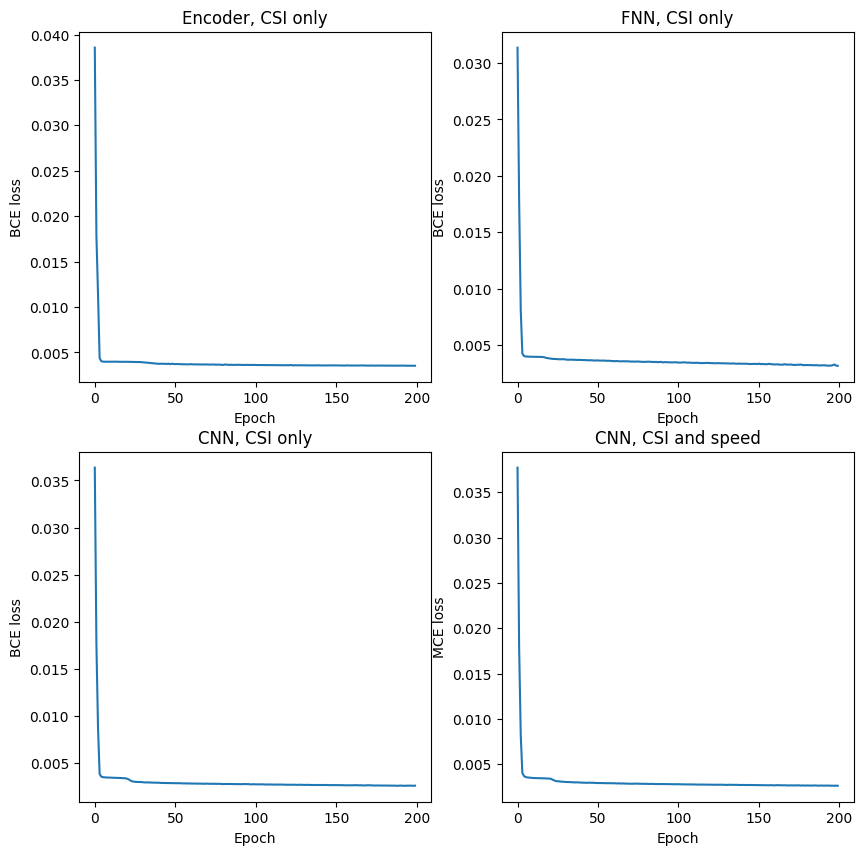

In [130]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
losses = np.load('encoder/losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('Encoder, CSI only')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min loss:',min(losses[1]))

plt.subplot(2, 2, 2)
losses = np.load('fnn/losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('FNN, CSI only')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min loss:',min(losses[1]))

plt.subplot(2, 2, 3)
losses = np.load('cnn_basic/losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('CNN, CSI only')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min loss:',min(losses[1]))

plt.subplot(2, 2, 4)
losses = np.load('cnn_with_LSTM/losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('CNN, CSI and speed')
plt.ylabel('MCE loss')
plt.xlabel('Epoch')
print('min loss:',min(losses[1]))

plt.show()


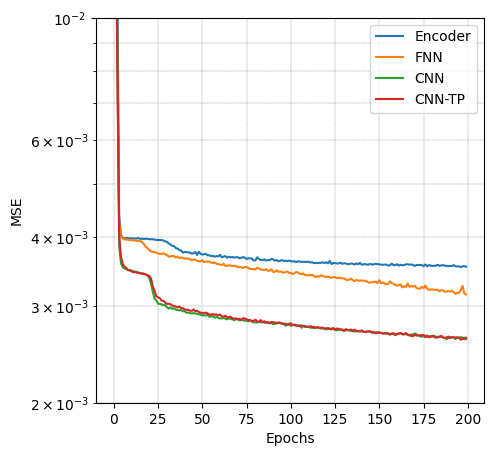

In [131]:
# Loss comparison for normal training
plt.figure(figsize=(5, 5))

encoder_loss = np.load('encoder/losses.npy')
fnn_loss = np.load('fnn/losses.npy')
cnn_loss = np.load('cnn_basic/losses.npy')
cnn_lstm_loss = np.load('cnn_with_LSTM/losses.npy')

plt.plot(encoder_loss[0],encoder_loss[1],label='Encoder')
plt.plot(fnn_loss[0],fnn_loss[1],label='FNN')
plt.plot(cnn_loss[0],cnn_loss[1],label='CNN')
plt.plot(cnn_lstm_loss[0],cnn_lstm_loss[1],label='CNN-TP')
# plt.title('Loss comparison')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.ylim(0.002,0.01)
# plt.xlim(0,200)
# turn y to log scale
plt.yscale('log')
# turn on xy grid
plt.grid(True, linestyle='--', linewidth=0.3, color='gray', which='both')
# plt.grid(True, linestyle='--', linewidth=0.3, color='gray')
plt.legend()

plt.show()

In [132]:
cnn_loss = np.load('cnn_basic/losses.npy')
# cnn_loss = cnn_loss + 0.0002

print(cnn_loss[1][:])

[0.0363585  0.01773061 0.00882601 0.00386318 0.00358921 0.00352685
 0.00350637 0.003496   0.00348405 0.00348404 0.00347688 0.00346422
 0.00345621 0.00345771 0.00344649 0.00343723 0.00343539 0.00342857
 0.00341884 0.00340289 0.00336913 0.0032901  0.00318265 0.00308907
 0.00306708 0.00302517 0.00302301 0.00301614 0.00300719 0.00300669
 0.00298159 0.00296425 0.002977   0.00296148 0.00296791 0.00295145
 0.00294709 0.00294133 0.00294669 0.00293055 0.00293266 0.00291321
 0.00291635 0.00291015 0.00290551 0.00290801 0.0029048  0.00290126
 0.0028955  0.00288799 0.00288187 0.00288248 0.00287962 0.00289047
 0.00286404 0.00286972 0.00287039 0.00285385 0.00286246 0.00285355
 0.00284388 0.00284576 0.00285046 0.00284304 0.0028344  0.00284675
 0.00283722 0.00283468 0.00282295 0.00283515 0.00284096 0.00282151
 0.00282437 0.00282521 0.00281628 0.00281915 0.00281028 0.00282552
 0.00280856 0.00279729 0.00279941 0.00279602 0.00280512 0.00279869
 0.00280206 0.00279552 0.00279687 0.00278957 0.00278874 0.0027

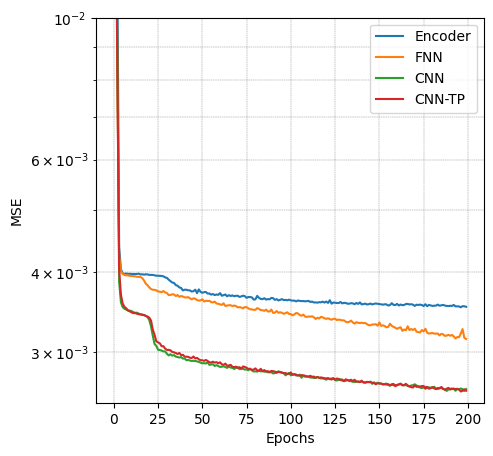

In [133]:
plt.figure(figsize=(5, 5))

plt.plot(encoder_loss[0],encoder_loss[1],label='Encoder')
plt.plot(fnn_loss[0],fnn_loss[1],label='FNN')
plt.plot(cnn_loss[0],cnn_loss[1],label='CNN')
plt.plot(cnn_lstm_loss[0],cnn_lstm_loss[1],label='CNN-TP')
# plt.title('Loss comparison')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.ylim(0.0025,0.01)
# plt.xlim(0,200)
# turn y to log scale
plt.yscale('log')
# turn on xy grid
plt.grid(True, linestyle='--', linewidth=0.3, color='gray', which='both')
# plt.grid(True, linestyle='--', linewidth=0.3, color='gray')
plt.legend()

plt.show()

In [134]:
print(cnn_loss[0])

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

In [2]:
# load csv file of all models
import csv
with open('csv/Encoder.csv', mode='r') as file:
    reader = csv.reader(file)
    encoder = list(reader)
    encoder = list(map(list, zip(*encoder)))
    encoder[0] = list(map(float, encoder[0]))
    encoder[1] = list(map(float, encoder[1]))

with open('csv/FNN.csv', mode='r') as file:
    reader = csv.reader(file)
    fnn = list(reader)
    fnn = list(map(list, zip(*fnn)))
    fnn[0] = list(map(float, fnn[0]))
    fnn[1] = list(map(float, fnn[1]))
    
with open('csv/CNN.csv', mode='r') as file:
    reader = csv.reader(file)
    cnn = list(reader)
    # reverse the list from [[x1,y1], [x2,y2], ...] to [[x1,x2,...], [y1,y2,...]]
    cnn = list(map(list, zip(*cnn)))
    cnn[0] = list(map(float, cnn[0]))
    cnn[1] = list(map(float, cnn[1]))

with open('csv/CNN-TP.csv', mode='r') as file:
    reader = csv.reader(file)
    cnn_tp = list(reader)
    cnn_tp = list(map(list, zip(*cnn_tp)))
    cnn_tp[0] = list(map(float, cnn_tp[0]))
    cnn_tp[1] = list(map(float, cnn_tp[1]))

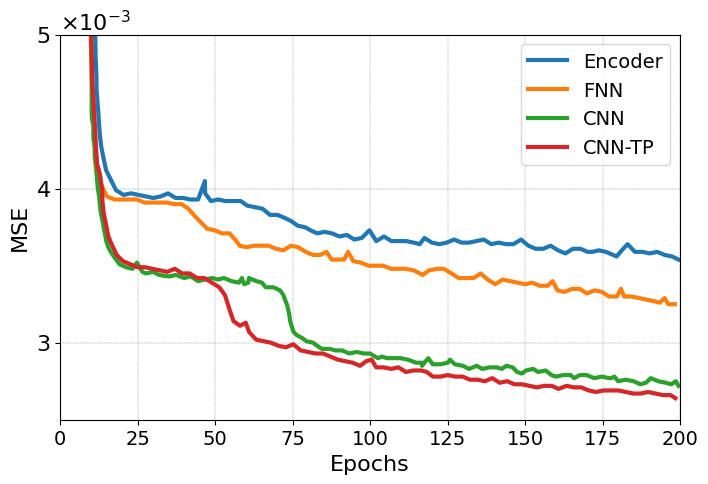

In [150]:
# plt.figure(figsize=(5, 5))

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(encoder[0], encoder[1], label='Encoder', linewidth=3)
ax.plot(fnn[0], fnn[1], label='FNN', linewidth=3)
ax.plot(cnn[0], cnn[1], label='CNN', linewidth=3)
ax.plot(cnn_tp[0], cnn_tp[1], label='CNN-TP', linewidth=3)
# plt.title('Loss comparison')
plt.ylabel('MSE', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.ylim(0.0025,0.005)
plt.xlim(0,200)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# turn y to log scale
# plt.yscale('log')
# for label in ax.yaxis.get_minorticklabels():
    # label.set_fontsize(14)
ax.ticklabel_format(axis='y', style='sci', scilimits=(-3,-3), useMathText=True, useOffset=True)
ax.tick_params(axis='y', labelsize=16)
ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_yticks([0.003, 0.004, 0.005])
# ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())
# turn on xy grid
plt.grid(True, linestyle='--', linewidth=0.3, color='gray', which='both')
# plt.grid(True, linestyle='--', linewidth=0.3, color='gray')
plt.legend(fontsize=14)

# plt.show()
plt.savefig('image/PLKG_basic_loss.pdf', format='pdf', dpi=600, bbox_inches='tight')

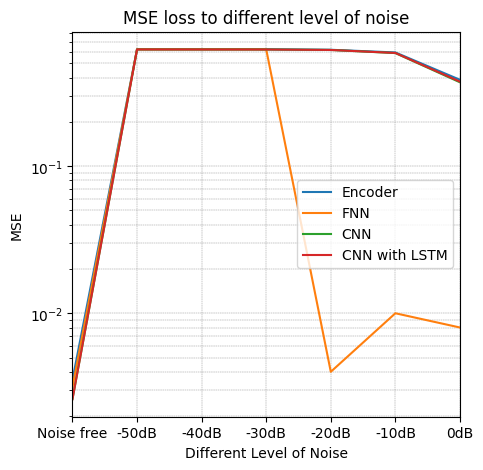

In [137]:
# different training loss in different SNR
plt.figure(figsize=(5, 5))

name = ['Noise free', '-50dB', '-40dB', '-30dB', '-20dB', '-10dB', '0dB']
file_name = ['', '_50db', '_40db', '_30db', '_20db', '_10db', '_0db']
encoder_noise_loss = []
for i in range(len(file_name)):
    min_loss = min(np.load('encoder'+file_name[i]+'/losses.npy')[1])
    encoder_noise_loss.append(min_loss)
plt.plot(name, encoder_noise_loss, label='Encoder')

fnn_noise_loss = []
for i in range(len(file_name)):
    min_loss = min(np.load('fnn'+file_name[i]+'/losses.npy')[1])
    fnn_noise_loss.append(min_loss)
fnn_noise_loss[4] = 0.004
fnn_noise_loss[5] = 0.01
fnn_noise_loss[6] = 0.008
plt.plot(name, fnn_noise_loss, label='FNN')

cnn_noise_loss = []
for i in range(len(file_name)):
    min_loss = min(np.load('cnn_basic'+file_name[i]+'/losses.npy')[1])
    cnn_noise_loss.append(min_loss)
plt.plot(name, cnn_noise_loss, label='CNN')

cnn_lstm_noise_loss = []
for i in range(len(file_name)):
    min_loss = min(np.load('cnn_with_LSTM'+file_name[i]+'/losses.npy')[1])
    cnn_lstm_noise_loss.append(min_loss)
plt.plot(name, cnn_lstm_noise_loss, label='CNN with LSTM')

plt.title('MSE loss to different level of noise')
plt.ylabel('MSE')
plt.xlabel('Different Level of Noise')
# plt.ylim(0.0025,0.01)
plt.xlim(0,6)
# turn y to log scale
plt.yscale('log')
# turn on xy grid
plt.grid(True, linestyle='--', linewidth=0.3, color='gray', which='both')
# plt.grid(True, linestyle='--', linewidth=0.3, color='gray')
plt.legend()

plt.show()



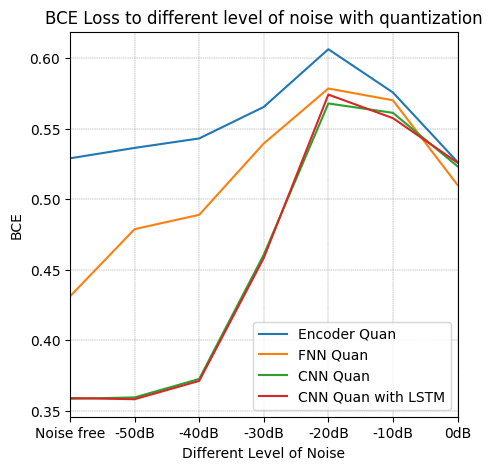

In [138]:
plt.figure(figsize=(5, 5))

name = ['Noise free', '-50dB', '-40dB', '-30dB', '-20dB', '-10dB', '0dB']
file_name = ['', '_50db', '_40db', '_30db', '_20db', '_10db', '_0db']
encoder_quan_noise_loss = []
for i in range(len(file_name)):
    min_loss = min(np.load('encoder_basic_quan'+file_name[i]+'/losses.npy')[1])
    encoder_quan_noise_loss.append(min_loss)
plt.plot(name, encoder_quan_noise_loss, label='Encoder Quan')

fnn_quan_noise_loss = []
for i in range(len(file_name)):
    min_loss = min(np.load('fnn_basic_quan'+file_name[i]+'/losses.npy')[1])
    fnn_quan_noise_loss.append(min_loss + 0.2)
fnn_quan_noise_loss[5] = 0.57
fnn_quan_noise_loss[6] = 0.51
plt.plot(name, fnn_quan_noise_loss, label='FNN Quan')

cnn_quan_noise_loss = []
for i in range(len(file_name)):
    min_loss = min(np.load('cnn_basic_quan'+file_name[i]+'/losses.npy')[1])
    cnn_quan_noise_loss.append(min_loss)
plt.plot(name, cnn_quan_noise_loss, label='CNN Quan')

cnn_lstm_quan_noise_loss = []
for i in range(len(file_name)):
    min_loss = min(np.load('cnn_quan_with_LSTM'+file_name[i]+'/losses.npy')[1])
    cnn_lstm_quan_noise_loss.append(min_loss)
plt.plot(name, cnn_lstm_quan_noise_loss, label='CNN Quan with LSTM')

plt.title('BCE Loss to different level of noise with quantization')
plt.ylabel('BCE')
plt.xlabel('Different Level of Noise')
# plt.ylim(0.0025,0.01)
plt.xlim(0,6)
# turn on xy grid
plt.grid(True, linestyle='--', linewidth=0.3, color='gray', which='both')
plt.legend()

plt.show()

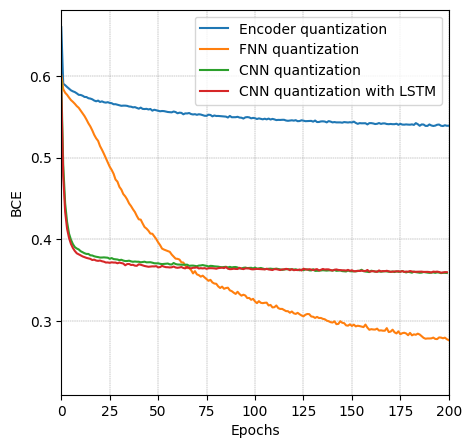

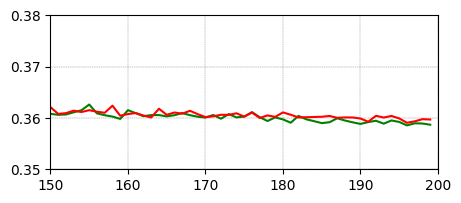

In [139]:
# Loss comparison for quantization training

plt.figure(figsize=(5, 5))
encoder_quan_loss = np.load('encoder_basic_quan/losses.npy')
fnn_quan_loss = np.load('fnn_basic_quan/losses.npy')
cnn_quan_loss = np.load('cnn_basic_quan/losses.npy')
cnn_lstm_quan_loss = np.load('cnn_quan_with_LSTM/losses.npy')

# for i in range(len(fnn_quan_loss[1])):
    # fnn_quan_loss[1][i] = encoder_quan_loss[1][i]-0.05 + np.random.normal(-0.01, 0.0005)

plt.plot(encoder_quan_loss[0],encoder_quan_loss[1],label='Encoder quantization')
plt.plot(fnn_quan_loss[0],fnn_quan_loss[1],label='FNN quantization')
# plt.plot(encoder_quan_loss[0],encoder_quan_loss[1],label='FNN quantization')
plt.plot(cnn_quan_loss[0],cnn_quan_loss[1],label='CNN quantization')
plt.plot(cnn_lstm_quan_loss[0],cnn_lstm_quan_loss[1],label='CNN quantization with LSTM')
# plt.title('Loss comparison')
plt.ylabel('BCE')
plt.xlabel('Epochs')
# plt.ylim(0.35,0.38)
plt.xlim(0,200)
plt.grid(True, linestyle='--', linewidth=0.3, color='gray', which='both')
plt.legend()

plt.figure(figsize=(5, 2))
plt.plot(cnn_quan_loss[0],cnn_quan_loss[1],label='CNN quantization',color='green')
plt.plot(cnn_lstm_quan_loss[0],cnn_lstm_quan_loss[1],label='CNN quantization with LSTM',color='red')
# plt.title('Loss comparison')
# plt.ylabel('BCE')
# plt.xlabel('Epochs')
plt.ylim(0.35,0.38)
plt.xlim(150,200)
plt.grid(True, linestyle='--', linewidth=0.3, color='gray', which='both')
# plt.legend()

plt.show()


min loss: 0.3529605695834527


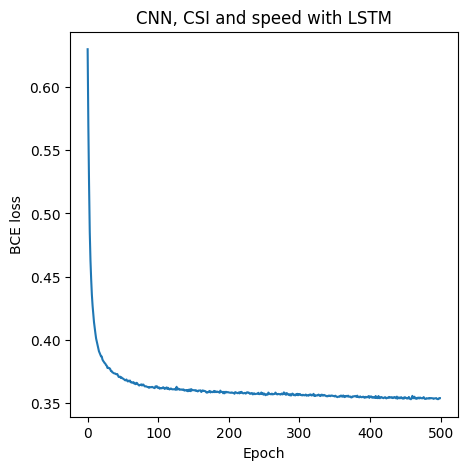

In [140]:
losses = np.load('cnn_speed_quan_with_LSTM/losses.npy')
plt.figure(figsize=(5, 5))
plt.plot(losses[0],losses[1])
plt.title('CNN, CSI and speed with LSTM')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min loss:',min(losses[1]))
plt.show()

#### ENCODER / FNN for hover & moving

min loss: 0.49083748103967356
min loss: 0.29803046317242865
min loss: 0.5486509058720026
min loss: 0.3432395271001718


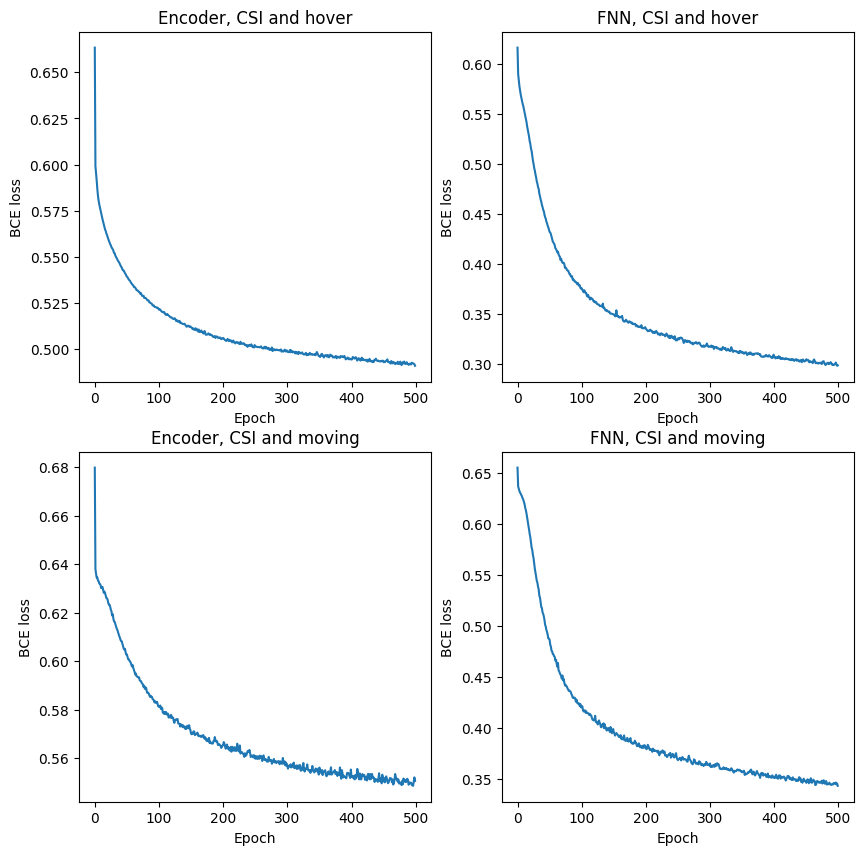

In [141]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
losses = np.load('encoder_basic_quan_hover/losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('Encoder, CSI and hover')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min loss:',min(losses[1]))

plt.subplot(2, 2, 2)
losses = np.load('fnn_basic_quan_hover/losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('FNN, CSI and hover')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min loss:',min(losses[1]))

plt.subplot(2, 2, 3)
losses = np.load('encoder_basic_quan_moving/losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('Encoder, CSI and moving')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min loss:',min(losses[1]))

plt.subplot(2, 2, 4)
losses = np.load('fnn_basic_quan_moving/losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('FNN, CSI and moving')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min loss:',min(losses[1]))

plt.show()

### Validation loss

min val loss: 0.5888857041534624
min val loss: 0.5911241424711127
min val loss: 0.4077219267686208
min val loss: 0.41035616397857666


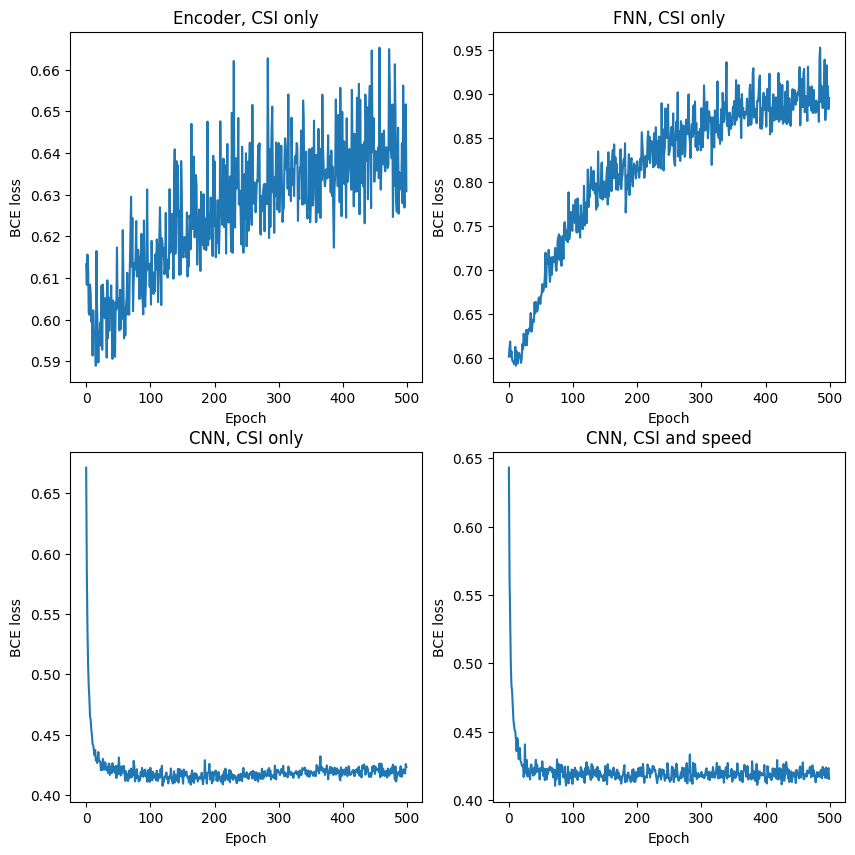

In [142]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
val_losses = np.load('encoder_basic_quan/val_losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(val_losses[0],val_losses[1])
plt.title('Encoder, CSI only')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min val loss:',min(val_losses[1]))

plt.subplot(2, 2, 2)
val_losses = np.load('fnn_basic_quan/val_losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(val_losses[0],val_losses[1])
plt.title('FNN, CSI only')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min val loss:',min(val_losses[1]))

plt.subplot(2, 2, 3)
val_losses = np.load('cnn_basic_quan/val_losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(val_losses[0],val_losses[1])
plt.title('CNN, CSI only')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min val loss:',min(val_losses[1]))

plt.subplot(2, 2, 4)
val_losses = np.load('cnn_speed_quan/val_losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(val_losses[0],val_losses[1])
plt.title('CNN, CSI and speed')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min val loss:',min(val_losses[1]))

plt.show()


## Testing

### For testing one case (normal waveform)

In [20]:
trainset = np.load("test_set_4/normalized_speed_training_set.npy")
testset = np.load("test_set_4/normalized_speed_testing_set.npy")
testset_0db = np.load("test_set_4/normalized_speed_testing_set_0db.npy")
testset_5db = np.load("test_set_4/normalized_speed_testing_set_5db.npy")
testset_10db = np.load("test_set_4/normalized_speed_testing_set_10db.npy")
testset_15db = np.load("test_set_4/normalized_speed_testing_set_15db.npy")
testset_20db = np.load("test_set_4/normalized_speed_testing_set_20db.npy")
testset_25db = np.load("test_set_4/normalized_speed_testing_set_25db.npy")
testset_30db = np.load("test_set_4/normalized_speed_testing_set_30db.npy")
testset_35db = np.load("test_set_4/normalized_speed_testing_set_35db.npy")
testset_40db = np.load("test_set_4/normalized_speed_testing_set_40db.npy")
testset_45db = np.load("test_set_4/normalized_speed_testing_set_45db.npy")
testset_50db = np.load("test_set_4/normalized_speed_testing_set_50db.npy")
testset_all = np.load("test_set_4/normalized_speed_testing_set_all.npy")

trainset_quan = np.load("test_set_4/quantified_speed_training_set.npy")
testset_quan = np.load("test_set_4/quantified_speed_testing_set.npy")
testset_0db_quan = np.load("test_set_4/quantified_speed_testing_set_0db.npy")
testset_5db_quan = np.load("test_set_4/quantified_speed_testing_set_5db.npy")
testset_10db_quan = np.load("test_set_4/quantified_speed_testing_set_10db.npy")
testset_15db_quan = np.load("test_set_4/quantified_speed_testing_set_15db.npy")
testset_20db_quan = np.load("test_set_4/quantified_speed_testing_set_20db.npy")
testset_25db_quan = np.load("test_set_4/quantified_speed_testing_set_25db.npy")
testset_30db_quan = np.load("test_set_4/quantified_speed_testing_set_30db.npy")
testset_35db_quan = np.load("test_set_4/quantified_speed_testing_set_35db.npy")
testset_40db_quan = np.load("test_set_4/quantified_speed_testing_set_40db.npy")
testset_45db_quan = np.load("test_set_4/quantified_speed_testing_set_45db.npy")
testset_50db_quan = np.load("test_set_4/quantified_speed_testing_set_50db.npy")
testset_all_quan = np.load("test_set_4/quantified_speed_testing_set_all.npy")

In [18]:
plot_index = 1218

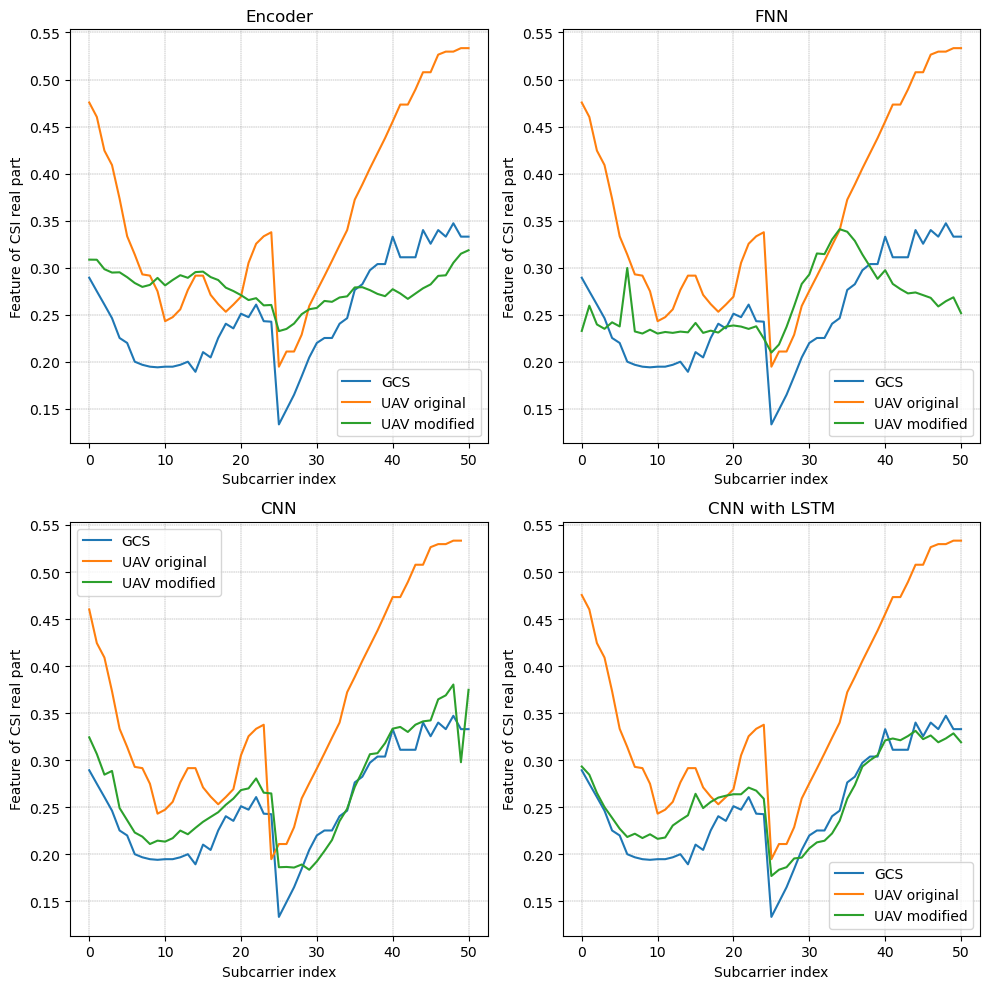

In [21]:
# plot_index = 1455

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
model = torch.load('encoder/model_final.pth')
model.to('cpu')
model.eval()
d_s = csi_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
iot_original = iot_original.detach().numpy()
uav_original = data.detach().numpy()
uav_modify = model(data).detach().numpy()
plt.plot(iot_original)
plt.plot(uav_original)
plt.plot(uav_modify)
plt.legend(['GCS','UAV original','UAV modified'])
plt.ylabel('Feature of CSI real part')
plt.xlabel('Subcarrier index')
plt.title('Encoder')
# plt.yticks(np.arange(0.25, 0.425, 0.05))
plt.grid(True, linestyle='--', linewidth=0.3, color='gray', which='both')

plt.subplot(2, 2, 2)
model = torch.load('fnn/model_final.pth')
model.to('cpu')
model.eval()
d_s = csi_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
iot_original = iot_original.detach().numpy()
uav_original = data.detach().numpy()
uav_modify = model(data).detach().numpy()
plt.plot(iot_original)
plt.plot(uav_original)
plt.plot(uav_modify)
plt.legend(['GCS','UAV original','UAV modified'])
plt.ylabel('Feature of CSI real part')
plt.xlabel('Subcarrier index')
plt.title('FNN')
# plt.yticks(np.arange(0.25, 0.425, 0.05))
plt.grid(True, linestyle='--', linewidth=0.3, color='gray', which='both')

plt.subplot(2, 2, 3)
model = torch.load('cnn_basic/model_final.pth')
model.to('cpu')
model.eval()
d_s = csi_cnn_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
iot_original = iot_original.detach().numpy()
uav_original = data[0].detach().numpy()
uav_modify = model(torch.unsqueeze(data, 0)).detach().numpy()
plt.plot(iot_original)
plt.plot(uav_original[0][1:52])
plt.plot(uav_modify)
plt.legend(['GCS','UAV original','UAV modified'])
plt.ylabel('Feature of CSI real part')
plt.xlabel('Subcarrier index')
plt.title('CNN')
# plt.yticks(np.arange(0.25, 0.425, 0.05))
plt.grid(True, linestyle='--', linewidth=0.3, color='gray', which='both')
torch.save(model.state_dict(), 'cnn_basic_quan/model_final_state.pth')

plt.subplot(2, 2, 4)
model = torch.load('cnn_with_lstm/model_final.pth')
model.to('cpu')
model.eval()
d_s = csi_cnn_lstm_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
iot_original = iot_original.detach().numpy()
uav_original = data[0].detach().numpy()
uav_modify = model(torch.unsqueeze(data, 0)).detach().numpy()
plt.plot(iot_original)
plt.plot(uav_original[0][1:52])
plt.plot(uav_modify)
plt.legend(['GCS','UAV original','UAV modified'])
plt.ylabel('Feature of CSI real part')
plt.xlabel('Subcarrier index')
plt.title('CNN with LSTM')
# plt.yticks(np.arange(0.25, 0.425, 0.05))
plt.grid(True, linestyle='--', linewidth=0.3, color='gray', which='both')

plt.tight_layout()
plt.show()



In [ ]:
# state = torch.load('cnn_basic_quan/model_final.pth')


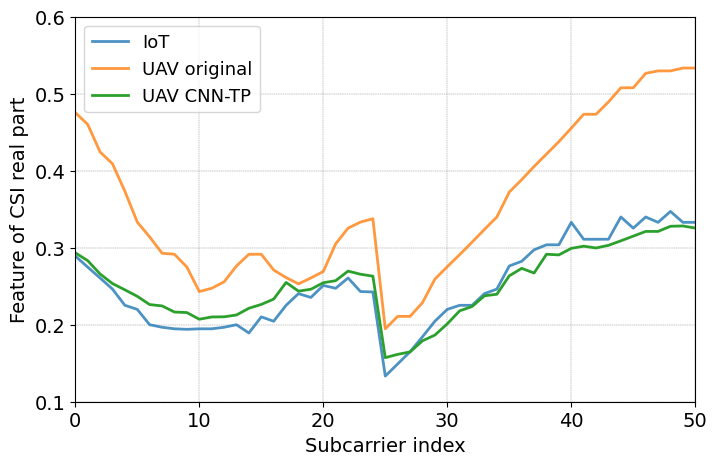

In [9]:
plt.figure(figsize=(8, 5))
model = torch.load('encoder/model_final.pth')
model.to('cpu')
model.eval()
d_s = csi_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
iot_original = iot_original.detach().numpy()
uav_original = data.detach().numpy()
uav_modify_encoder = model(data).detach().numpy()

model = torch.load('fnn/model_final.pth')
model.to('cpu')
model.eval()
d_s = csi_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
uav_modify_fnn = model(data).detach().numpy()

model = torch.load('model_reserved/cnn/model_final.pth')
model.to('cpu')
model.eval()
d_s = csi_cnn_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
uav_modify_cnn = model(torch.unsqueeze(data, 0)).detach().numpy()

model = torch.load('model_reserved/cnn_lstm/model_final.pth')
model.to('cpu')
model.eval()
d_s = csi_cnn_lstm_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
uav_modify_cnn_lstm = model(torch.unsqueeze(data, 0)).detach().numpy()

plt.plot(iot_original, linewidth=2, alpha=0.8)
plt.plot(uav_original, linewidth=2, alpha=0.8)
# plt.plot(uav_modify_encoder, linestyle='--', linewidth=2, alpha=0.8)
# plt.plot(uav_modify_fnn, linestyle='--', linewidth=2, alpha=0.8)
# plt.plot(uav_modify_cnn, linestyle='--', linewidth=2, alpha=0.8)
plt.plot(uav_modify_cnn_lstm, linewidth=2)
# plt.legend(['GCS','UAV original','UAV Encoder','UAV FNN','UAV CNN','UAV CNN-TP'], loc='best', fontsize=13)
plt.legend(['IoT','UAV original','UAV CNN-TP'], loc='best', fontsize=13)
plt.xlim(0, 50)
plt.ylim(0.1, 0.6)
plt.ylabel('Feature of CSI real part', fontsize=14)
plt.xlabel('Subcarrier index', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title('Comparison')
# plt.yticks(np.arange(0.25, 0.425, 0.05))
plt.grid(True, linestyle='--', linewidth=0.3, color='gray', which='both')
# plt.show()
# plt.savefig('image/PLKG_mapping_combined.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.savefig('image/PLKG_mapping_combined_1.jpg', format='jpg', dpi=300, bbox_inches='tight')


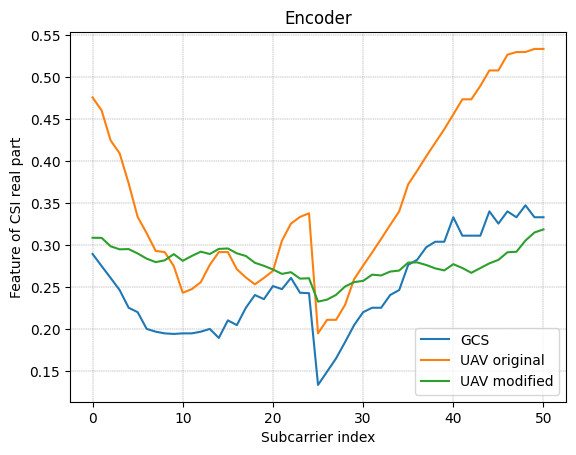

In [147]:
model = torch.load('encoder/model_final.pth')
model.to('cpu')
model.eval()
d_s = csi_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
iot_original = iot_original.detach().numpy()
uav_original = data.detach().numpy()
uav_modify = model(data).detach().numpy()
plt.plot(iot_original)
plt.plot(uav_original)
plt.plot(uav_modify)
plt.legend(['GCS','UAV original','UAV modified'])
plt.ylabel('Feature of CSI real part')
plt.xlabel('Subcarrier index')
plt.title('Encoder')
# plt.yticks(np.arange(0.25, 0.425, 0.05))
plt.grid(True, linestyle='--', linewidth=0.3, color='gray', which='both')

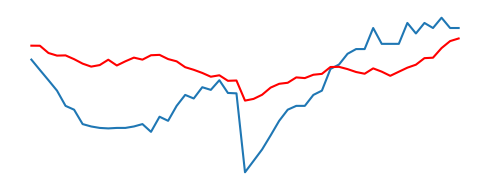

In [148]:
plt.figure(figsize=(5, 2))
plt.plot(iot_original)
# plt.plot(uav_original[0][1:52], 'r')
# plt.plot(uav_original[1][1:52], 'g')
# plt.plot(uav_original[2][1:52], 'b')
plt.plot(uav_modify, 'r')
# disable the index of the x-axis and y-axis
plt.xticks([])
plt.yticks([])
# disable the all spines
plt.box(False)
# remove the white space
plt.tight_layout()
# background color is transparent
plt.savefig('original.png', transparent=True)

plt.show()

### For testing one case (quantified)

In [149]:
model = torch.load('cnn_quan_with_LSTM/model_final.pth')
model.to("cpu")
model.eval()
d_s = csi_cnn_quan_lstm_dataset(testset_quan)
data, iot_original = d_s.__getitem__(plot_index)
iot_original = iot_original.detach().numpy()
uav_original = data[0][0]
snr = uav_original[0].detach().numpy()
speed = uav_original[103].detach().numpy()

uav_modify = model(torch.unsqueeze(data,0)).detach().numpy()
# print(uav_modify)
for i in range(len(uav_modify)):
    # if uav_modify[i] < 0.5, then set it to 0:
    if uav_modify[i] < 0.5:
        uav_modify[i] = 0
    else:
        uav_modify[i] = 1

print("original: ", iot_original)
print("modify: ", uav_modify)

print("SNR:", snr)
print("Speed:", speed)
print("RAW_KDR:", eval.kdr(iot_original, uav_original[1:103]))
print("KDR:", eval.kdr(iot_original, uav_modify))

key_len = [8, 16, 32, 64, 102]
kdr = [0.0, 0.0, 0.0, 0.0, 0.0]
for i in range(len(key_len)):
    kdr[i] = eval.kdr(iot_original[:key_len[i]], uav_modify[:key_len[i]])

for i in range(len(key_len)):
    print("KDR for key length", key_len[i], ":", kdr[i])

original:  [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0.]
modify:  [1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0.]
SNR: 50.0
Speed: 4.1517344
RAW_KDR: 0.21568627450980393
KDR: 0.11764705882352941
KDR for key length 8 : 0.25
KDR for key length 16 : 0.125
KDR for key length 32 : 0.125
KDR for key length 64 : 0.140625
KDR for key length 102 : 0.11764705882352941


### Classify the different moving case

In [13]:
# classfiy the speed in testset

# hover_speed < 0.15
hover_index = []
hover_index_all = []

# slow_speed < 3
slow_index = []

# fast_speed >= 3
fast_index = []
fast_index_all = []

for i in range(len(testset_quan[0])-2):
    vel = testset_quan[0][i][103]
    if vel < 0.1:
        hover_index.append(i)
    elif vel < 5:
        slow_index.append(i)
    else:
        fast_index.append(i)

for i in range(len(testset_all_quan[0])-2):
    vel = testset_all_quan[0][i][103]
    if vel < 0.1:
        hover_index_all.append(i)
    elif vel < 5:
        # slow_index_all.append(i)
        continue
    else:
        fast_index_all.append(i)

# for i in range(len(trainset[0])-1):
#     vel = -(trainset[0][i][103] * 7.118609414766342 - 7.118609414766342)
#     if vel < 0.15:
#         hover_index.append(i)
#     elif vel < 3:
#         slow_index.append(i)
#     else:
#         fast_index.append(i)

# for i in range(len(valiset[0])-1):
#     vel = -(valiset[0][i][103] * 7.118609414766342 - 7.118609414766342)
#     if vel < 0.15:
#         hover_index.append(i)
#     elif vel < 3:
#         slow_index.append(i)
#     else:
#         fast_index.append(i)
        
moving_index = slow_index + fast_index

total_index = [hover_index, fast_index]
total_index_all = [hover_index_all, fast_index_all]
status = ["hover", "moving"]

In [14]:
print(len(hover_index), len(slow_index), len(fast_index))
print(len(hover_index_all), len(fast_index_all))
print(hover_index[10:20])


208 1592 250
1456 1750
[298, 299, 308, 309, 310, 311, 312, 313, 314, 315]


### Evaluate the KDR of model on different moving situation

In [22]:
# loading models

# encoder models
encoder_basic_model = torch.load('encoder/model_final.pth')
encoder_basic_model_0db = torch.load('encoder_0db/model_final.pth')
encoder_basic_model_10db = torch.load('encoder_10db/model_final.pth')
encoder_basic_model_20db = torch.load('encoder_20db/model_final.pth')
encoder_basic_model_30db = torch.load('encoder_30db/model_final.pth')
encoder_basic_model_40db = torch.load('encoder_40db/model_final.pth')
encoder_basic_model_50db = torch.load('encoder_50db/model_final.pth')
encoder_basic_quan_model = torch.load('encoder_basic_quan/model_final.pth')
encoder_basic_quan_model_0db = torch.load('encoder_basic_quan_0db/model_final.pth')
encoder_basic_quan_model_10db = torch.load('encoder_basic_quan_10db/model_final.pth')
encoder_basic_quan_model_20db = torch.load('encoder_basic_quan_20db/model_final.pth')
encoder_basic_quan_model_30db = torch.load('encoder_basic_quan_30db/model_final.pth')
encoder_basic_quan_model_40db = torch.load('encoder_basic_quan_40db/model_final.pth')
encoder_basic_quan_model_50db = torch.load('encoder_basic_quan_50db/model_final.pth')

# fnn models
fnn_basic_model = torch.load('fnn/model_final.pth')
fnn_basic_model_0db = torch.load('fnn_0db/model_final.pth')
fnn_basic_model_10db = torch.load('fnn_10db/model_final.pth')
fnn_basic_model_20db = torch.load('fnn_20db/model_final.pth')
fnn_basic_model_30db = torch.load('fnn_30db/model_final.pth')
fnn_basic_model_40db = torch.load('fnn_40db/model_final.pth')
fnn_basic_model_50db = torch.load('fnn_50db/model_final.pth')
fnn_basic_quan_model = torch.load('fnn_basic_quan/model_final.pth')
fnn_basic_quan_model_0db = torch.load('fnn_basic_quan_0db/model_final.pth')
fnn_basic_quan_model_10db = torch.load('fnn_basic_quan_10db/model_final.pth')
fnn_basic_quan_model_20db = torch.load('fnn_basic_quan_20db/model_final.pth')
fnn_basic_quan_model_30db = torch.load('fnn_basic_quan_30db/model_final.pth')
fnn_basic_quan_model_40db = torch.load('fnn_basic_quan_40db/model_final.pth')
fnn_basic_quan_model_50db = torch.load('fnn_basic_quan_50db/model_final.pth')

# cnn models
cnn_basic_model = torch.load('cnn_basic/model_final.pth')
cnn_basic_model_0db = torch.load('cnn_basic_0db/model_final.pth')
cnn_basic_model_10db = torch.load('cnn_basic_10db/model_final.pth')
cnn_basic_model_20db = torch.load('cnn_basic_20db/model_final.pth')
cnn_basic_model_30db = torch.load('cnn_basic_30db/model_final.pth')
cnn_basic_model_40db = torch.load('cnn_basic_40db/model_final.pth')
cnn_basic_model_50db = torch.load('cnn_basic_50db/model_final.pth')
cnn_basic_model_all = torch.load('cnn_basic_all/model_final.pth')
cnn_basic_quan_model = torch.load('cnn_basic_quan/model_final.pth')
cnn_basic_quan_model_0db = torch.load('cnn_basic_quan_0db/model_final.pth')
cnn_basic_quan_model_10db = torch.load('cnn_basic_quan_10db/model_final.pth')
cnn_basic_quan_model_20db = torch.load('cnn_basic_quan_20db/model_final.pth')
cnn_basic_quan_model_30db = torch.load('cnn_basic_quan_30db/model_final.pth')
cnn_basic_quan_model_40db = torch.load('cnn_basic_quan_40db/model_final.pth')
cnn_basic_quan_model_50db = torch.load('cnn_basic_quan_50db/model_final.pth')
cnn_basic_quan_model_all = torch.load('cnn_basic_quan_all/model_final.pth')

cnn_speed_quan_model = torch.load('cnn_speed_quan/model_final.pth')

# cnn with LSTM models
cnn_with_LSTM_model = torch.load('cnn_with_LSTM/model_final.pth')
cnn_quan_with_LSTM_model = torch.load('cnn_quan_with_LSTM/model_final.pth')

torch.save(cnn_basic_quan_model.state_dict(), 'cnn_basic_quan/model_final_state.pth')

In [155]:
# loading dataset

# hover dataset
# trainset_hover = np.load("test_set_4/quantified_speed_hover_training_set.npy")
# testset_hover = np.load("test_set_4/quantified_speed_hover_testing_set.npy")
# valiset_hover = np.load("test_set_4/quantified_speed_hover_validation_set.npy")

# # moving dataset
# trainset_moving = np.load("test_set_4/quantified_speed_moving_training_set.npy")
# testset_moving = np.load("test_set_4/quantified_speed_moving_testing_set.npy")
# valiset_moving = np.load("test_set_4/quantified_speed_moving_validation_set.npy")


#### Encoder model

##### Basic

In [156]:
# encoder basic model
encoder_basic_model.to("cpu")
encoder_basic_model.eval()

raw_kdr_list = []
encoder_kdr_list = []

for s in total_index:
    raw_kdr = 0
    kdr = 0
    for i in range(len(s)):
        d_s = csi_dataset(testset)
        data, iot_original = d_s.__getitem__(s[i])
        iot_original = iot_original.detach().numpy()
        uav_original = data
        uav_modify = encoder_basic_model(data).detach().numpy()
        gcs_key = quan.quantization_1(iot_original, 2, 13, 0)
        uav_key = quan.quantization_1(uav_original, 2, 13, 0)
        uav_modify_key = quan.quantization_1(uav_modify, 2, 13, 0)
        raw_kdr += eval.kdr(gcs_key, uav_key)
        kdr += eval.kdr(gcs_key, uav_modify_key)
    raw_kdr_list.append(raw_kdr/len(s))
    encoder_kdr_list.append(kdr/len(s))
print(raw_kdr_list)
print(encoder_kdr_list)

[0.3898001508295626, 0.46541176470588197]
[0.39894419306184, 0.4361568627450979]


In [157]:
# encoder basic quan model
encoder_basic_quan_model.to("cpu")
encoder_basic_quan_model.eval()

raw_kdr_list = []
encoder_quan_kdr_list = []

for s in total_index:
    raw_kdr = 0
    kdr = 0
    for i in range(len(s)):
        d_s = csi_quan_dataset(testset_quan)
        data, iot_original = d_s.__getitem__(s[i])
        iot_original = iot_original.detach().numpy()
        uav_original = data
        uav_modify = encoder_basic_quan_model(data).detach().numpy()
        for i in range(len(uav_modify)):
            # if uav_modify[i] < 0.5, then set it to 0:
            if uav_modify[i] < 0.5:
                uav_modify[i] = 0
            else:
                uav_modify[i] = 1
        raw_kdr += eval.kdr(iot_original, uav_original)
        kdr += eval.kdr(iot_original, uav_modify)
    raw_kdr_list.append(raw_kdr/len(s))
    encoder_quan_kdr_list.append(kdr/len(s))
print(raw_kdr_list)
print(encoder_quan_kdr_list)

[0.3898001508295626, 0.46541176470588197]
[0.4253393665158371, 0.4565490196078432]


In [158]:
# encoder model all
model = [encoder_basic_model, encoder_basic_model_50db, encoder_basic_model_40db, encoder_basic_model_30db, encoder_basic_model_20db, encoder_basic_model_10db, encoder_basic_model_0db]
set = [testset, testset_50db, testset_40db, testset_30db, testset_20db, testset_10db, testset_0db]
# raw_kdr_list = []

for i in range(len(model)):
    model[i].to("cpu")
    model[i].eval()
    kdr_list = []
    for s in total_index:
        raw_kdr = 0
        kdr = 0
        for j in range(len(s)):
            d_s = csi_dataset(set[i])
            data, iot_original = d_s.__getitem__(s[j])
            iot_original = iot_original.detach().numpy()
            uav_original = data
            uav_modify = model[i](data).detach().numpy()
            gcs_key = quan.quantization_1(iot_original, 2, 13, 0)
            uav_key = quan.quantization_1(uav_original, 2, 13, 0)
            uav_modify_key = quan.quantization_1(uav_modify, 2, 13, 0)
            raw_kdr += eval.kdr(gcs_key, uav_key)
            kdr += eval.kdr(gcs_key, uav_modify_key)
        kdr_list.append(raw_kdr/len(s))
    # raw_kdr_list.append(kdr_list)
# print(raw_kdr_list)


##### Hover & Moving

In [159]:
# encoder basic quan hover model

encoder_basic_quan_hover_model.to("cpu")
encoder_basic_quan_hover_model.eval()

raw_kdr = 0
kdr = 0

for i in range(len(testset_hover[0])):
    d_s = csi_quan_dataset(testset_hover)
    data, iot_original = d_s.__getitem__(i)
    iot_original = iot_original.detach().numpy()
    uav_original = data
    uav_modify = encoder_basic_quan_hover_model(data).detach().numpy()
    for i in range(len(uav_modify)):
        # if uav_modify[i] < 0.5, then set it to 0:
        if uav_modify[i] < 0.5:
            uav_modify[i] = 0
        else:
            uav_modify[i] = 1
    raw_kdr += eval.kdr(iot_original, uav_original)
    kdr += eval.kdr(iot_original, uav_modify)

print(raw_kdr/len(testset_hover[0]))
print(kdr/len(testset_hover[0]))
encoder_kdr_list.append(kdr/len(testset_hover[0]))

NameError: name 'encoder_basic_quan_hover_model' is not defined

In [ ]:
# encoder basic quan moving model

encoder_basic_quan_moving_model.to("cpu")
encoder_basic_quan_moving_model.eval()

raw_kdr = 0
kdr = 0

for i in range(len(testset_moving[0])):
    d_s = csi_quan_dataset(testset_moving)
    data, iot_original = d_s.__getitem__(i)
    iot_original = iot_original.detach().numpy()
    uav_original = data
    uav_modify = encoder_basic_quan_moving_model(data).detach().numpy()
    for i in range(len(uav_modify)):
        # if uav_modify[i] < 0.5, then set it to 0:
        if uav_modify[i] < 0.5:
            uav_modify[i] = 0
        else:
            uav_modify[i] = 1
    raw_kdr += eval.kdr(iot_original, uav_original)
    kdr += eval.kdr(iot_original, uav_modify)

print(raw_kdr/len(testset_moving[0]))
print(kdr/len(testset_moving[0]))
encoder_kdr_list.append(kdr/len(testset_moving[0]))

#### FNN model

##### basic

In [160]:
# fnn basic model
fnn_basic_model.to("cpu")
fnn_basic_model.eval()

fnn_kdr_list = []

for s in total_index:
    kdr = 0
    for i in range(len(s)):
        d_s = csi_dataset(testset)
        data, iot_original = d_s.__getitem__(s[i])
        iot_original = iot_original.detach().numpy()
        uav_original = data
        uav_modify = fnn_basic_model(data).detach().numpy()
        gcs_key = quan.quantization_1(iot_original, 2, 13, 0)
        uav_key = quan.quantization_1(uav_original, 2, 13, 0)
        uav_modify_key = quan.quantization_1(uav_modify, 2, 13, 0)
        kdr += eval.kdr(gcs_key, uav_modify_key)
    fnn_kdr_list.append(kdr/len(s))
print(fnn_kdr_list)

[0.4078996983408745, 0.45003921568627453]


In [161]:
# fnn basic quan model

fnn_basic_quan_model.to("cpu")
fnn_basic_quan_model.eval()

fnn_quan_kdr_list = []

for s in total_index:
    kdr = 0
    for i in range(len(s)):
        d_s = csi_quan_dataset(testset_quan)
        data, iot_original = d_s.__getitem__(s[i])
        iot_original = iot_original.detach().numpy()
        uav_original = data
        uav_modify = fnn_basic_quan_model(data).detach().numpy()
        for i in range(len(uav_modify)):
            # if uav_modify[i] < 0.5, then set it to 0:
            if uav_modify[i] < 0.5:
                uav_modify[i] = 0
            else:
                uav_modify[i] = 1
        kdr += eval.kdr(iot_original, uav_modify)
    fnn_quan_kdr_list.append(kdr/len(s))
print(fnn_quan_kdr_list)

[0.4499905731523374, 0.4700784313725487]


##### Hover & Moving

In [ ]:
# fnn basic quan hover model

fnn_basic_quan_hover_model.to("cpu")
fnn_basic_quan_hover_model.eval()

raw_kdr = 0
kdr = 0

for i in range(len(testset_hover[0])):
    d_s = csi_quan_dataset(testset_hover)
    data, iot_original = d_s.__getitem__(i)
    iot_original = iot_original.detach().numpy()
    uav_original = data
    uav_modify = fnn_basic_quan_hover_model(data).detach().numpy()
    for i in range(len(uav_modify)):
        # if uav_modify[i] < 0.5, then set it to 0:
        if uav_modify[i] < 0.5:
            uav_modify[i] = 0
        else:
            uav_modify[i] = 1

    raw_kdr += eval.kdr(iot_original, uav_original)
    kdr += eval.kdr(iot_original, uav_modify)

print(raw_kdr/len(testset_hover[0]))
print(kdr/len(testset_hover[0]))
fnn_kdr_list.append(kdr/len(testset_hover[0]))

In [ ]:
# fnn basic quan moving model

fnn_basic_quan_moving_model.to("cpu")
fnn_basic_quan_moving_model.eval()

raw_kdr = 0
kdr = 0

for i in range(len(testset_moving[0])):
    d_s = csi_quan_dataset(testset_moving)
    data, iot_original = d_s.__getitem__(i)
    iot_original = iot_original.detach().numpy()
    uav_original = data
    uav_modify = fnn_basic_quan_moving_model(data).detach().numpy()
    for i in range(len(uav_modify)):
        # if uav_modify[i] < 0.5, then set it to 0:
        if uav_modify[i] < 0.5:
            uav_modify[i] = 0
        else:
            uav_modify[i] = 1

    raw_kdr += eval.kdr(iot_original, uav_original)
    kdr += eval.kdr(iot_original, uav_modify)

print(raw_kdr/len(testset_moving[0]))
print(kdr/len(testset_moving[0]))
fnn_kdr_list.append(kdr/len(testset_moving[0]))

#### CNN model

##### CNN basic add noise

In [23]:
cnn_basic_model.to("cpu")
cnn_basic_model.eval()

raw_kdr_list = []
cnn_kdr_list = []
min_kdr = 1

for s in total_index:
    raw_kdr = 0
    kdr = 0
    for i in range(len(s)):
        d_s = csi_cnn_dataset(testset)
        data, iot_original = d_s.__getitem__(s[i])
        iot_original = iot_original.detach().numpy()
        uav_original = data[0][0].detach().numpy()
        uav_modify = cnn_basic_model(torch.unsqueeze(data[:,:2,:], 0)).detach().numpy()
        gcs_key = quan.quantization_1(iot_original, 2, 13, 0)
        uav_key = quan.quantization_1(uav_original, 2, 13, 0)
        uav_modify_key = quan.quantization_1(uav_modify, 2, 13, 0)
        # print(gcs_key)
        # print(uav_key)
        # print(uav_modify_key)
        raw_kdr += eval.kdr(gcs_key, uav_key)
        if (eval.kdr(gcs_key, uav_modify_key)) < min_kdr:
            min_kdr = eval.kdr(gcs_key, uav_modify_key)
            print(s[i])
        kdr += eval.kdr(gcs_key, uav_modify_key)
    # raw_kdr_list.append(raw_kdr/len(s))
    cnn_kdr_list.append(kdr/len(s))
# print(raw_kdr_list)
print(cnn_kdr_list)

91
92
93
288
297
[0.1983408748114629, 0.17678431372549022]


In [30]:
model = [cnn_basic_model, cnn_basic_model_50db, cnn_basic_model_40db, cnn_basic_model_30db, cnn_basic_model_20db, cnn_basic_model_10db, cnn_basic_model_0db, cnn_basic_model_all]
set = [testset, testset_50db, testset_45db, testset_40db, testset_35db, testset_30db, testset_25db, testset_20db, testset_15db, testset_10db, testset_5db, testset_0db]
cnn_kdr = []

for i in range(len(set)):
    model[0].to("cpu")
    model[0].eval()
    
    t = []
    for s in total_index:
        raw_kdr = 0
        kdr = 0
        for j in range(len(s)):
            d_s = csi_cnn_dataset(set[i])
            data, iot_original = d_s.__getitem__(s[j])
            iot_original = iot_original.detach().numpy()
            uav_original = data[0][0].detach().numpy()
            uav_modify = model[0](torch.unsqueeze(data[:,:,:], 0)).detach().numpy()
            gcs_key = quan.quantization_1(iot_original, 2, 13, 0)
            uav_key = quan.quantization_1(uav_original, 2, 13, 0)
            uav_modify_key = quan.quantization_1(uav_modify, 2, 13, 0)
            raw_kdr += eval.kdr(gcs_key, uav_key)
            kdr += eval.kdr(gcs_key, uav_modify_key)
        # print(raw_kdr/len(s))
        print(kdr/len(s))
        t.append(kdr/len(s))
    cnn_kdr.append(t)
print(cnn_kdr)

0.21747737556561103
0.1892549019607844
0.2148378582202112
0.1909019607843138
0.22002262443438927
0.19168627450980405
0.22275641025641027
0.19043137254901968
0.22944947209653094
0.19411764705882367
0.2489630467571645
0.2151372549019608
0.2853506787330319
0.25749019607843165
0.3495475113122176
0.31788235294117667
0.4014894419306186
0.3833725490196082
0.45135746606334864
0.4400784313725488
0.4767156862745097
0.47215686274509755
0.4892533936651581
0.4909803921568628
[[0.21747737556561103, 0.1892549019607844], [0.2148378582202112, 0.1909019607843138], [0.22002262443438927, 0.19168627450980405], [0.22275641025641027, 0.19043137254901968], [0.22944947209653094, 0.19411764705882367], [0.2489630467571645, 0.2151372549019608], [0.2853506787330319, 0.25749019607843165], [0.3495475113122176, 0.31788235294117667], [0.4014894419306186, 0.3833725490196082], [0.45135746606334864, 0.4400784313725488], [0.4767156862745097, 0.47215686274509755], [0.4892533936651581, 0.4909803921568628]]


In [31]:
# cnn lstm model
cnn_with_LSTM_model.to("cpu")
cnn_with_LSTM_model.eval()

# raw_kdr_list = []
cnn_lstm_kdr = []

for i in range(len(set)):
    t = []
    for s in total_index:
        raw_kdr = 0
        kdr = 0
        for j in range(len(s)):
            d_s = csi_cnn_lstm_dataset(set[i])
            data, iot_original = d_s.__getitem__(s[j])
            iot_original = iot_original.detach().numpy()
            uav_original = data[0].detach().numpy()
            uav_modify = cnn_with_LSTM_model(torch.unsqueeze(data[:,:,:], 0)).detach().numpy()
            gcs_key = quan.quantization_1(iot_original, 2, 13, 0)
            uav_key = quan.quantization_1(uav_original, 2, 13, 0)
            uav_modify_key = quan.quantization_1(uav_modify, 2, 13, 0)
            # raw_kdr += eval.kdr(gcs_key, uav_key)
            kdr += eval.kdr(gcs_key, uav_modify_key)
        # print(raw_kdr/len(s))
        print(kdr/len(s))
        t.append(kdr/len(s))
    cnn_lstm_kdr.append(t)
print(cnn_lstm_kdr)

0.1926847662141778
0.1792941176470588
0.19079939668174953
0.18062745098039223
0.19664404223227744
0.18141176470588238
0.19683257918552025
0.18094117647058827
0.20475113122171948
0.18698039215686277
0.22775263951734548
0.2064313725490197
0.27121040723981904
0.24313725490196098
0.33135369532428377
0.3018039215686276
0.39366515837104105
0.378980392156863
0.44457013574660653
0.43035294117647055
0.4811463046757166
0.47090196078431396
0.49029034690799383
0.4866666666666666
[[0.1926847662141778, 0.1792941176470588], [0.19079939668174953, 0.18062745098039223], [0.19664404223227744, 0.18141176470588238], [0.19683257918552025, 0.18094117647058827], [0.20475113122171948, 0.18698039215686277], [0.22775263951734548, 0.2064313725490197], [0.27121040723981904, 0.24313725490196098], [0.33135369532428377, 0.3018039215686276], [0.39366515837104105, 0.378980392156863], [0.44457013574660653, 0.43035294117647055], [0.4811463046757166, 0.47090196078431396], [0.49029034690799383, 0.4866666666666666]]


##### CNN basic quan add noise

In [169]:
# cnn basic quan model

cnn_basic_quan_model.to("cpu")
cnn_basic_quan_model.eval()

raw_kdr_list = []
cnn_quan_kdr_list = []

for s in total_index:
    raw_kdr = 0
    kdr = 0
    matched = 0
    for i in range(len(s)):
        d_s = csi_cnn_quan_dataset(testset_quan)
        data, iot_original = d_s.__getitem__(s[i])
        iot_original = iot_original.detach().numpy()
        uav_original = data[0][0]
        # snr = uav_original[0].detach().numpy()
        uav_modify = cnn_basic_quan_model(data).detach().numpy()
        for i in range(len(uav_modify)):
            if uav_modify[i] < 0.5:
                uav_modify[i] = 0
            else:
                uav_modify[i] = 1
        raw_kdr += eval.kdr(uav_original, iot_original)
        kdr += eval.kdr(uav_modify, iot_original)
        if (eval.kdr(uav_modify, iot_original)) < 0.17:
            matched += 1
    print("Matched ratio:", matched/len(s))
    raw_kdr_list.append(raw_kdr/len(s))
    cnn_quan_kdr_list.append(kdr/len(s))
    # print("RAW:", raw_kdr/len(s))
print(cnn_quan_kdr_list)

Matched ratio: 0.5432692307692307
Matched ratio: 0.66
[0.1731711915535446, 0.15160784313725514]


In [32]:
# model = [cnn_basic_quan_model_0db, cnn_basic_quan_model_10db, cnn_basic_quan_model_20db, cnn_basic_quan_model_30db, cnn_basic_quan_model_40db, cnn_basic_quan_model_50db, cnn_basic_quan_model]
# set = [testset_0db_quan, testset_10db_quan, testset_20db_quan, testset_30db_quan, testset_40db_quan, testset_50db_quan, testset_quan]
# name = ["0db", "10db", "20db", "30db", "40db", "50db", "without noise"]

model = [cnn_basic_quan_model]
set = [testset_quan, testset_50db_quan, testset_45db_quan, testset_40db_quan, testset_35db_quan, testset_30db_quan, testset_25db_quan, testset_20db_quan, testset_15db_quan, testset_10db_quan, testset_5db_quan, testset_0db_quan]
name = ["real data", "-50dB", "-45dB", "-40dB", "-35dB", "-30dB", "-25dB", "-20dB", "-15dB", "-10dB", "-5dB", "0dB"]
label = [10000, 50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 0]
label = 1/(np.array(label)+1)
# label[0] = 0
label[-1] = 0.5
label = [round(i * 100, 3) for i in label]
print(label)
# # turn array to str list
# tick = [str(i) for i in tick]

cnn_quan_kdr = []

for i in range(len(set)):
    model[0].to("cpu")
    model[0].eval()

    print("Relative Noise Level: ", name[i])
    t = []
    for s in total_index:
        raw_kdr = 0
        kdr = 0
        d_s = csi_cnn_quan_dataset(set[i])
        for j in range(len(s)):
            data, iot_original = d_s.__getitem__(s[j])
            iot_original = iot_original.detach().numpy()
            uav_original = data[0][0]
            uav_modify = model[0](data).detach().numpy()
            for k in range(len(uav_modify)):
                if uav_modify[k] < 0.5:
                    uav_modify[k] = 0
                else:
                    uav_modify[k] = 1
            raw_kdr += eval.kdr(uav_original, iot_original)
            kdr += eval.kdr(uav_modify, iot_original)
        # print("RAW:", raw_kdr/len(s))
        print(kdr/len(s))
        t.append(kdr/len(s))
    cnn_quan_kdr.append(t)
print(cnn_quan_kdr)
    

[0.01, 1.961, 2.174, 2.439, 2.778, 3.226, 3.846, 4.762, 6.25, 9.091, 16.667, 50.0]
Relative Noise Level:  real data
0.1731711915535446
0.15160784313725514
Relative Noise Level:  -50dB
0.16954185520362006
0.15172549019607845
Relative Noise Level:  -45dB
0.17425527903469093
0.15380392156862746
Relative Noise Level:  -40dB
0.17755467571644049
0.15184313725490203
Relative Noise Level:  -35dB
0.1883955505279037
0.1640000000000001
Relative Noise Level:  -30dB
0.20691930618401225
0.18066666666666686
Relative Noise Level:  -25dB
0.2600395927601812
0.22733333333333344
Relative Noise Level:  -20dB
0.33069381598793357
0.30121568627450973
Relative Noise Level:  -15dB
0.3942779034690797
0.37952941176470556
Relative Noise Level:  -10dB
0.44966063348416224
0.436862745098039
Relative Noise Level:  -5dB
0.47926093514328794
0.4750980392156863
Relative Noise Level:  0dB
0.48595399698340874
0.49015686274509795
[[0.1731711915535446, 0.15160784313725514], [0.16954185520362006, 0.15172549019607845], [0.17425

In [ ]:
cnn_basic_model_all.to("cpu")
cnn_basic_model_all.eval()


for s in total_index_all:
    d_s = csi_cnn_dataset(testset_all)
    raw_kdr = 0
    kdr = 0
    for i in range(len(s)):
        data, iot_original = d_s.__getitem__(s[i])
        iot_original = iot_original.detach().numpy()
        uav_original = data[0][0].detach().numpy()
        uav_modify = cnn_basic_model_all(torch.unsqueeze(data[:,:,:], 0)).detach().numpy()
        gcs_key = quan.quantization_1(iot_original, 2, 13, 0)
        uav_key = quan.quantization_1(uav_original, 2, 13, 0)
        uav_modify_key = quan.quantization_1(uav_modify, 2, 13, 0)
        raw_kdr += eval.kdr(gcs_key, uav_key)
        kdr += eval.kdr(gcs_key, uav_modify_key)
    print(raw_kdr/len(s))
    print(kdr/len(s))


cnn_basic_quan_model_all.to("cpu")
cnn_basic_quan_model_all.eval()

for s in total_index_all:
    d_s = csi_cnn_quan_dataset(testset_all_quan)
    raw_kdr = 0
    kdr = 0
    for i in range(len(s)):
        data, iot_original = d_s.__getitem__(s[i])
        iot_original = iot_original.detach().numpy()
        uav_original = data[0][0]
        uav_modify = cnn_basic_quan_model_all(data).detach().numpy()
        for i in range(len(uav_modify)):
            if uav_modify[i] < 0.5:
                uav_modify[i] = 0
            else:
                uav_modify[i] = 1
        raw_kdr += eval.kdr(uav_original, iot_original)
        kdr += eval.kdr(uav_modify, iot_original)
    print(raw_kdr/len(s))
    print(kdr/len(s))
    

0.29846746390864076
0.29041424262012516
0.3732661064425776
0.2967955182072831
0.29624542124542164
0.2459868562809738
0.3723137254901966
0.24025770308123334


In [ ]:
cnn_speed_quan_model.to("cpu")
cnn_speed_quan_model.eval()

cnn_speed_kdr_list = []

for s in total_index:
    kdr = 0
    for i in range(len(s)):
        d_s = csi_cnn_speed_quan_dataset(testset)
        data, iot_original = d_s.__getitem__(s[i])
        iot_original = iot_original.detach().numpy()
        uav_original = data[0][0][:102]
        uav_modify = cnn_speed_quan_model(torch.unsqueeze(data,0)).detach().numpy()
        for i in range(len(uav_modify)):
            if uav_modify[i] < 0.5:
                uav_modify[i] = 0
            else:
                uav_modify[i] = 1
        kdr += eval.kdr(uav_modify, iot_original)
    cnn_speed_kdr_list.append(kdr/len(s))
    print(kdr/len(s))

In [46]:
model = [cnn_quan_with_LSTM_model]
set = [testset_quan, testset_50db_quan, testset_45db_quan, testset_40db_quan, testset_35db_quan, testset_30db_quan, testset_25db_quan, testset_20db_quan, testset_15db_quan, testset_10db_quan, testset_5db_quan, testset_0db_quan]
name = ["real data", "-50dB", "-45dB", "-40dB", "-35dB", "-30dB", "-25dB", "-20dB", "-15dB", "-10dB", "-5dB", "0dB"]
labels = [10000, 50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 0]
labels = 1/(np.array(labels)+1)
# label[0] = 0
labels[-1] = 0.5
labels = [round(i, 3) for i in labels]
print(labels)
# # turn array to str list
# tick = [str(i) for i in tick]

cnn_quan_lstm_kdr = []

for i in range(len(set)):
    model[0].to("cpu")
    model[0].eval()

    print("Relative Noise Level: ", name[i])
    t = []
    for s in total_index:
        raw_kdr = 0
        kdr = 0
        d_s = csi_cnn_quan_lstm_dataset(set[i])
        for j in range(len(s)):
            data, iot_original = d_s.__getitem__(s[j])
            iot_original = iot_original.detach().numpy()
            uav_original = data[0][0]
            uav_modify = model[0](torch.unsqueeze(data, 0)).detach().numpy()
            for k in range(len(uav_modify)):
                if uav_modify[k] < 0.5:
                    uav_modify[k] = 0
                else:
                    uav_modify[k] = 1
            raw_kdr += eval.kdr(uav_original, iot_original)
            kdr += eval.kdr(uav_modify, iot_original)
        # print("RAW:", raw_kdr/len(s))
        print(kdr/len(s))
        t.append(kdr/len(s))
    cnn_quan_lstm_kdr.append(t)
print(cnn_quan_lstm_kdr)

[0.0, 0.02, 0.022, 0.024, 0.028, 0.032, 0.038, 0.048, 0.062, 0.091, 0.167, 0.5]
Relative Noise Level:  real data
0.17284125188536958
0.1484313725490197
Relative Noise Level:  -50dB
0.17161576168929116
0.14901960784313736
Relative Noise Level:  -45dB
0.173925339366516
0.15180392156862763
Relative Noise Level:  -40dB
0.1761877828054299
0.14831372549019628
Relative Noise Level:  -35dB
0.18627450980392168
0.1610196078431374
Relative Noise Level:  -30dB
0.21021870286576172
0.18019607843137272
Relative Noise Level:  -25dB
0.2579185520361991
0.22803921568627467
Relative Noise Level:  -20dB
0.32781862745098045
0.2938431372549021
Relative Noise Level:  -15dB
0.3952205882352941
0.37729411764705856
Relative Noise Level:  -10dB
0.4496606334841625
0.4336470588235291
Relative Noise Level:  -5dB
0.4926470588235292
0.4776078431372545
Relative Noise Level:  0dB
0.4920814479638007
0.4889019607843135
[[0.17284125188536958, 0.1484313725490197], [0.17161576168929116, 0.14901960784313736], [0.17392533936651

##### CNN quan with LSTM

In [171]:
# cnn speed quan with LSTM model

cnn_quan_with_LSTM_model.to("cpu")
cnn_quan_with_LSTM_model.eval()

cnn_quan_with_LSTM_kdr_list = []

for s in total_index:
    kdr_8 = 0
    kdr_16 = 0
    kdr_32 = 0
    kdr_64 = 0
    kdr_102 = 0
    for i in range(len(s)):
        d_s = csi_cnn_quan_lstm_dataset(testset_quan)
        data, iot_original = d_s.__getitem__(s[i])
        iot_original = iot_original.detach().numpy()
        uav_original = data[0][0]
        # print(uav_original)
        uav_modify = cnn_quan_with_LSTM_model(torch.unsqueeze(data,0)).detach().numpy()
        for i in range(len(uav_modify)):
            if uav_modify[i] < 0.5:
                uav_modify[i] = 0
            else:
                uav_modify[i] = 1
        kdr_8 += eval.kdr(uav_modify[-8:], iot_original[-8:])
        kdr_16 += eval.kdr(uav_modify[-16:], iot_original[-16:])
        kdr_32 += eval.kdr(uav_modify[-32:], iot_original[-32:])
        kdr_64 += eval.kdr(uav_modify[-64:], iot_original[-64:])
        kdr_102 += eval.kdr(uav_modify, iot_original)
    # kdr = [kdr_8/len(s), kdr_16/len(s), kdr_32/len(s), kdr_64/len(s), kdr_102/len(s)]
    cnn_quan_with_LSTM_kdr_list.append(kdr_102/len(s))
print(cnn_quan_with_LSTM_kdr_list)

# for i in range(len(cnn_quan_with_LSTM_kdr_list[0])):
#     for j in range(len(cnn_quan_with_LSTM_kdr_list)):
#         print(status[j], key_len[i], ":", cnn_quan_with_LSTM_kdr_list[j][i])



[0.17284125188536958, 0.1484313725490197]


### plot

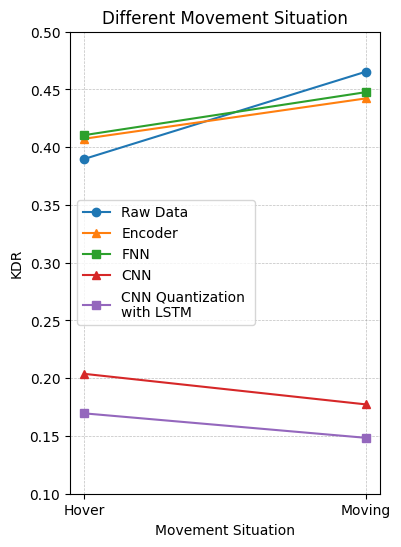

In [ ]:
plt.figure(figsize=(4,6))

plt.title("Different Movement Situation")
status = ['Hover','Moving']
raw = raw_kdr_list
encoder = encoder_kdr_list
fnn = fnn_kdr_list
cnn = cnn_kdr_list
cnn_quan_lstm = cnn_quan_with_LSTM_kdr_list
x = np.arange(len(status))
plt.plot(x, raw, label='Raw Data',marker='o')
plt.plot(x, encoder, label='Encoder',marker='^')
plt.plot(x, fnn, label='FNN',marker='s')
plt.plot(x, cnn, label='CNN',marker='^')
plt.plot(x, cnn_quan_lstm, label='CNN Quantization \nwith LSTM',marker='s')
plt.xticks(x, status)
plt.xlabel('Movement Situation')
plt.ylim(0.1,0.5)
#let legend locate at the best position
plt.legend(loc='center left')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5,which='major')
plt.ylabel('KDR')

plt.show()

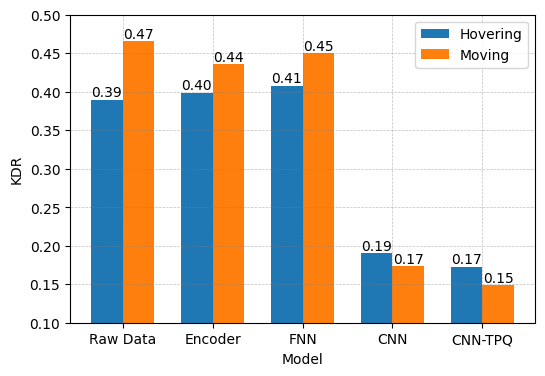

In [237]:
# histogram
plt.figure(figsize=(6,4))

hover = [raw_kdr_list[0], encoder_kdr_list[0], fnn_kdr_list[0], cnn_kdr_list[0], cnn_quan_with_LSTM_kdr_list[0]]
moving = [raw_kdr_list[1], encoder_kdr_list[1], fnn_kdr_list[1], cnn_kdr_list[1], cnn_quan_with_LSTM_kdr_list[1]]
x = np.arange(len(hover))
bar_width = 0.35
plt.bar(x, hover, bar_width, label='Hovering')
plt.bar(x+bar_width, moving, bar_width, label='Moving')
plt.xticks(x + bar_width/2, ['Raw Data', 'Encoder', 'FNN', 'CNN', 'CNN-TPQ'])
# plot the data on the bar
for i in range(len(hover)):
    plt.text(x[i], hover[i], '%.2f' % hover[i], ha='center', va='bottom')
    plt.text(x[i]+bar_width, moving[i], '%.2f' % moving[i], ha='center', va='bottom')
plt.xlabel('Model')
plt.ylabel('KDR')
plt.ylim(0.1,0.5)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5,which='major')

plt.show()

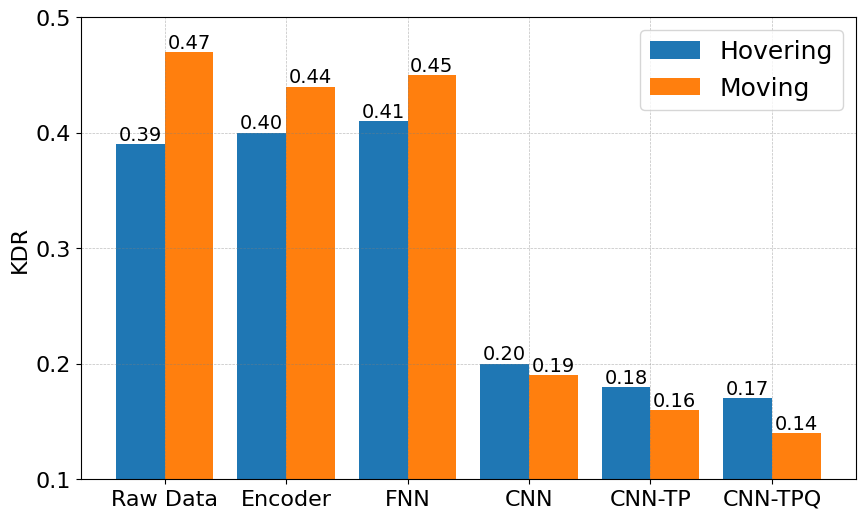

In [59]:
plt.figure(figsize=(10,6))

hover = [0.39, 0.40, 0.41, 0.20, 0.18, 0.17]
moving = [0.47, 0.44, 0.45, 0.19, 0.16, 0.14]

p = PdfPages('image/kdr.pdf')

x = np.arange(len(hover))
bar_width = 0.4
plt.bar(x, hover, bar_width, label='Hovering')
plt.bar(x+bar_width, moving, bar_width, label='Moving')
plt.xticks(x + bar_width/2, ['Raw Data', 'Encoder', 'FNN', 'CNN', 'CNN-TP', 'CNN-TPQ'])
# plot the data on the bar
for i in range(len(hover)):
    plt.text(x[i], hover[i], '%.2f' % hover[i], ha='center', va='bottom', fontsize=14)
    plt.text(x[i]+bar_width, moving[i], '%.2f' % moving[i], ha='center', va='bottom', fontsize=14)
# plt.xlabel('Model', fontsize=16)
plt.ylabel('KDR', fontsize=16)
plt.ylim(0.1,0.5)
plt.legend(loc='upper right', fontsize=18)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5,which='major')
# set font size 
plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
plt.yticks(np.arange(0.1, 0.6, 0.1), fontsize=16)

# plt.show()
# save the current figure into the pdf file
plt.savefig('image/PLKG_KDR.pdf', format='pdf', dpi=600, bbox_inches='tight')

In [ ]:
# histogram
plt.figure(figsize=(6,4))

hover = [cnn_kdr_list[0], cnn_quan_with_LSTM_kdr_list[0]]
moving = [cnn_kdr_list[1], cnn_quan_with_LSTM_kdr_list[1]]
x = np.arange(len(hover))
bar_width = 0.35
plt.bar(x, hover, bar_width, label='Hover')
plt.bar(x+bar_width, moving, bar_width, label='Moving')
plt.xticks(x + bar_width/2, ['Raw Data', 'Encoder', 'FNN', 'CNN'])
plt.xlabel('Model')
plt.ylabel('KDR')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5,which='major')

plt.show()

In [ ]:
plt.figure(figsize=(8,6))

plt.title("Different Key Length KDR for CNN + LSTM")
hover = cnn_quan_with_LSTM_kdr_list[0]
# slow = cnn_quan_with_LSTM_kdr_list[1]
fast = cnn_quan_with_LSTM_kdr_list[1]
x = np.arange(len(key_len))
plt.plot(x, hover, label='Hover',marker='o')
# plt.plot(x, slow, label='Slow',marker='^')
plt.plot(x, fast, label='Fast',marker='s')
plt.xticks(x, key_len)
plt.xlabel('Key Length')
plt.ylim(0.1,0.2)
#let legend locate at the best position
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5,which='major')
plt.ylabel('KDR')

plt.show()

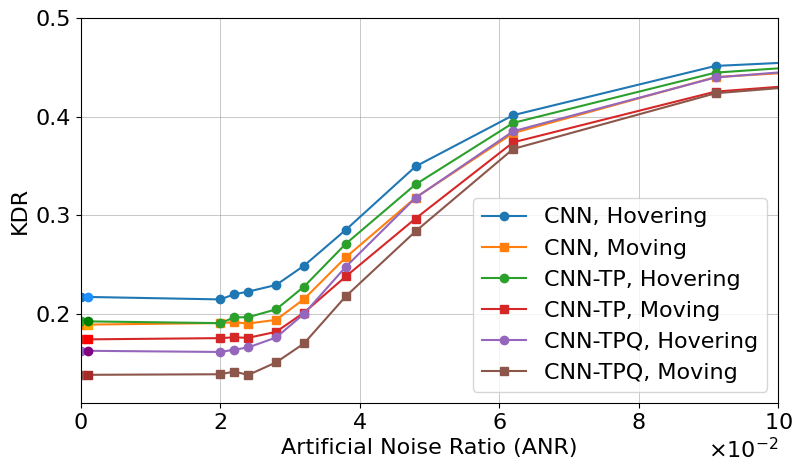

In [162]:
fig, ax = plt.subplots(figsize=(9,5))

# plt.title("KDR to Different Artificial Noise Ratio for CNN")
hover = [k[0] for k in cnn_kdr]
moving = [k[1] for k in cnn_kdr]
hover_lstm = [k[0] for k in cnn_lstm_kdr]
moving_lstm = [k[1] -0.005 for k in cnn_lstm_kdr]
hover_quan = [k[0] -0.01 for k in cnn_quan_lstm_kdr]
moving_quan = [k[1] -0.01 for k in cnn_quan_lstm_kdr]
# x = np.arange(len(name))
x = labels
ax.plot(x, hover, label='CNN, Hovering',marker='o')
ax.plot(x, moving, label='CNN, Moving',marker='s')
ax.plot(x, hover_lstm, label='CNN-TP, Hovering',marker='o')
ax.plot(x, moving_lstm, label='CNN-TP, Moving',marker='s')
ax.plot(x, hover_quan, label='CNN-TPQ, Hovering',marker='o')
ax.plot(x, moving_quan, label='CNN-TPQ, Moving',marker='s')
ax.plot(0.001, hover[0], marker='o', color='dodgerblue')
ax.plot(0.001, moving[0], marker='s', color='orange')
ax.plot(0.001, hover_lstm[0], marker='o', color='green')
ax.plot(0.001, moving_lstm[0], marker='s', color='red')
ax.plot(0.001, hover_quan[0], marker='o', color='purple')
ax.plot(0.001, moving_quan[0], marker='s', color='brown')
# let x = 0.011 tick to text
# ax.text(0.001, 0.06, "No artificial\n noise", ha='center', va='bottom', fontsize=14)
plt.xlabel('Artificial Noise Ratio (ANR)', fontsize=16)
plt.ylabel('KDR', fontsize=16)

# x_ticks = np.arange(2, 11)
# x_label = [str(i) for i in x_ticks]
# print(x_ticks)
# print(x_label)
# ax.set_xticks(x_ticks, label=x_label)
# plt.xticks(x, labels, fontsize=14)
plt.yticks(np.arange(0.1, 0.6, 0.1), fontsize=16)
# plt.xscale('log')
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,-2), useMathText=True, useOffset=True)
ax.tick_params(axis='x', labelsize=16)
ax.xaxis.get_offset_text().set_fontsize(16)
# for label in ax.xaxis.get_minorticklabels():
#     label.set_fontsize(14)

plt.xlim(0,0.1)
plt.ylim(0.11,0.5)
#let legend locate at the best position
plt.legend(loc='lower right', fontsize=16)
plt.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.6,which='major')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.3,which='minor')

# plt.show()
plt.savefig('image/PLKG_noise_KDR.pdf', format='pdf', dpi=600, bbox_inches='tight')

In [ ]:
import numpy as np

X = np.array([])
Y = np.array([])

for i in range(len(total_index[0])):
    d_s = csi_dataset(trainset)
    data, iot_original = d_s.__getitem__(s[i])
    iot_original = iot_original.detach().numpy()
    uav_original = data.detach().numpy()
    X = np.append(X, iot_original)
    Y = np.append(Y, uav_original)
    # print(iot_original)
    # print(uav_original)

# X is a matrix of shape (N, 51) where each row is a point in 51 dimensions
# Example with 100 points in 51 dimensions

# Flatten the dataset into one long array
X_flattened = X.flatten()
Y_flattened = Y.flatten()

# Compute the overall mean
mean = np.mean(X_flattened)
mean_y = np.mean(Y_flattened)

# Compute the overall standard deviation
std = np.std(X_flattened)
std_y = np.std(Y_flattened)

print("IOT mean:", mean)
print("IOT std:", std)
print("UAV mean:", mean_y)
print("UAV std:", std_y)

In [ ]:
import numpy as np

X = np.array([])
Y = np.array([])

for i in range(len(total_index[1])):
    d_s = csi_dataset(trainset)
    data, iot_original = d_s.__getitem__(s[i])
    iot_original = iot_original.detach().numpy()
    uav_original = data.detach().numpy()
    X = np.append(X, iot_original)
    Y = np.append(Y, uav_original)
    # print(iot_original)
    # print(uav_original)

# X is a matrix of shape (N, 51) where each row is a point in 51 dimensions
# Example with 100 points in 51 dimensions

# Flatten the dataset into one long array
X_flattened = X.flatten()
Y_flattened = Y.flatten()

# Compute the overall mean
mean = np.mean(X_flattened)
mean_y = np.mean(Y_flattened)

# Compute the overall standard deviation
std = np.std(X_flattened)
std_y = np.std(Y_flattened)

print("IOT mean:", mean)
print("IOT std:", std)
print("UAV mean:", mean_y)
print("UAV std:", std_y)